In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#df = pd.read_csv('/mnt/DATA/ML/training/keras/clickbait/server/scores-together.txt', sep='\t')

def parameter_string_to_dict(parameters):
    parameters_list = (' ' + parameters).split(' --')[1:]
    parameters_dict = dict([p.split(' ') for p in parameters_list])
    return parameters_dict

def read_scores(path, model):
    df_scores = pd.read_csv(path, sep='\t', 
                     names=['time', 'val_mean_squared_error', 'epochs', 'parameters'], 
                     converters={'time': (lambda x: x.split(': ')[1]),
                                 'val_mean_squared_error': (lambda x: float(x.split(': ')[1])), 
                                 'epochs': (lambda x: x.split(': ')[1]), 
                                 'parameters': (lambda x: parameter_string_to_dict(x.split(': ')[1]))}
                    )
    df_scores['model'] = model
    df_params = pd.DataFrame(df_scores['parameters'].tolist())
    del df_scores['parameters']
    return pd.concat([df_scores, df_params], axis=1)

In [3]:
#base_path = '/mnt/DATA/ML/training/keras/clickbait/server'
base_path = os.getcwd()
df_wimages = read_scores(path=os.path.join(base_path, 'scores-inceptionresnetv2.orig.txt'),
                         model='inceptionresnetv2')
df_noimages = read_scores(path=os.path.join(base_path, 'scores-noimages.orig.txt'),
                         model='noimages')
df_wimages_big = read_scores(path=os.path.join(base_path, 'scores-inceptionresnetv2-big.orig.txt'),
                         model='inceptionresnetv2-big')
df_noimages_big = read_scores(path=os.path.join(base_path, 'scores-noimages-big.orig.txt'),
                         model='noimages-big')

df_wimages_big_flagged = read_scores(path=os.path.join(base_path, 'scores-inceptionresnetv2-big-flagged.orig.txt'),
                         model='inceptionresnetv2-big-flagged')

df = pd.concat([
    #df_wimages, 
    #df_noimages, 
    #df_wimages_big, 
    df_noimages_big,
    df_wimages_big_flagged
], sort=False)

# REMOVE OUTLIERS
# per group
#df_grouped = df.groupby('marker')['val_mean_squared_error']
#df = df[df_grouped.transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1)]
# total
#df = df[df['val_mean_squared_error'].transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1)]
#df = df[df['val_mean_squared_error'] < 0.1]

#df.sort_values('val_mean_squared_error')
df


,time,val_mean_squared_error,epochs,model,batch-size,dev-dir,feature-shapes,model-dir,nb-epoch,nb-threads,rep,setting,train-dir,image-embedding-function
0,2018-07-01 18:48:15,0.0374,8,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-...,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",/mnt/hdd/experiments/abinder/clickbait/exp_noi...,100,7,0,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",/mnt/hdd/datasets/clickbait/clickbait17-valida...,NaN
1,2018-07-01 21:04:09,0.0386,13,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-...,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",/mnt/hdd/experiments/abinder/clickbait/exp_noi...,100,7,1,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",/mnt/hdd/datasets/clickbait/clickbait17-valida...,NaN
2,2018-07-01 22:50:47,0.0356,10,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-...,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",/mnt/hdd/experiments/abinder/clickbait/exp_noi...,100,7,2,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",/mnt/hdd/datasets/clickbait/clickbait17-valida...,NaN
3,2018-07-02 01:38:32,0.0377,16,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-...,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",/mnt/hdd/experiments/abinder/clickbait/exp_noi...,100,7,3,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",/mnt/hdd/datasets/clickbait/clickbait17-valida...,NaN
4,2018-07-02 03:01:45,0.0368,8,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-...,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",/mnt/hdd/experiments/abinder/clickbait/exp_noi...,100,7,4,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",/mnt/hdd/datasets/clickbait/clickbait17-valida...,NaN
5,2018-07-02 04:56:42,0.0371,11,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-...,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",/mnt/hdd/experiments/abinder/clickbait/exp_noi...,100,7,5,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",/mnt/hdd/datasets/clickbait/clickbait17-valida...,NaN
6,2018-07-02 06:53:06,0.0379,11,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-...,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",/mnt/hdd/experiments/abinder/clickbait/exp_noi...,100,7,6,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",/mnt/hdd/datasets/clickbait/clickbait17-valida...,NaN
7,2018-07-02 08:38:14,0.0375,10,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-...,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",/mnt/hdd/experiments/abinder/clickbait/exp_noi...,100,7,7,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",/mnt/hdd/datasets/clickbait/clickbait17-valida...,NaN
8,2018-07-02 09:41:25,0.0369,6,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-...,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",/mnt/hdd/experiments/abinder/clickbait/exp_noi...,100,7,8,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",/mnt/hdd/datasets/clickbait/clickbait17-valida...,NaN
9,2018-07-02 11:06:16,0.0367,8,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-...,"{""targetParagraphs"":{""model"":""create_lstm"",""ma...",/mnt/hdd/experiments/abinder/clickbait/exp_noi...,100,7,9,"{""final_layers"":[512],""dropout"":0.5,""learn_rat...",/mnt/hdd/datasets/clickbait/clickbait17-valida...,NaN


('inceptionresnetv2-big-flagged', 'noimages-big')


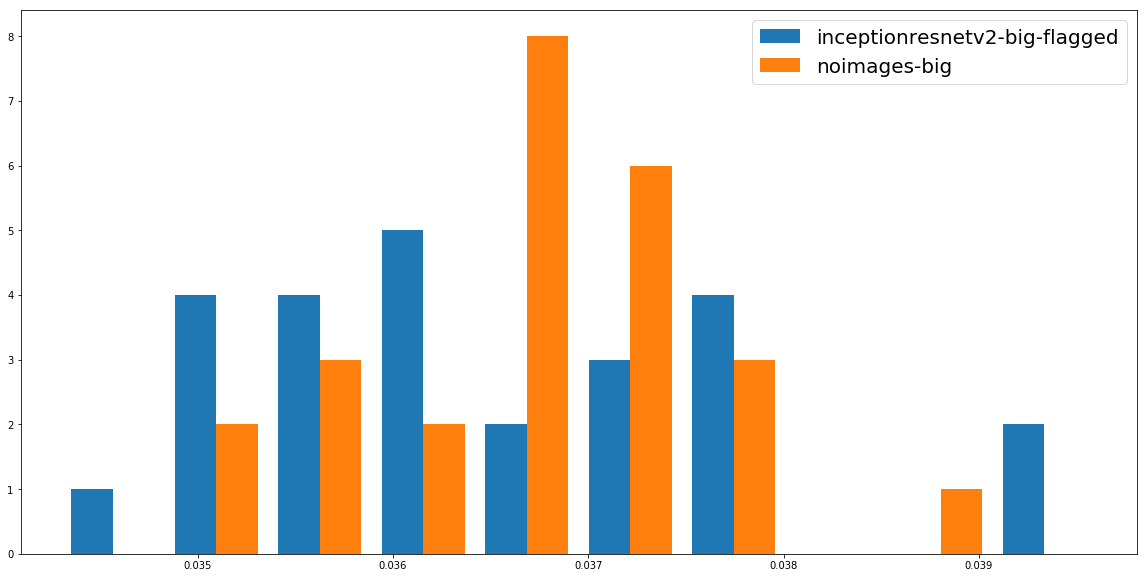

In [4]:
#df.hist(bins=100, column='val_mean_squared_error', by='image_function', figsize=(20,10), density=True, histtype='bar')
#plt.figure()

df_grouped = df.groupby('model')
labels, vals = zip(*[(name, group['val_mean_squared_error']) for name, group in df_grouped])
print(labels)

#np.random.seed(19680801)

#for n, group in df_grouped:
#    print(n)
    #print(group['val_mean_squared_error'])

#colors = ['red', 'tan', 'lime']
plt.figure(1, figsize=(20,10))
n, bins, patches = plt.hist(vals, bins = 10, histtype='bar', label=labels)#, color=colors, label=colors)
ax = plt.gca()
ax.legend(prop={'size': 20})
#print(type(fig))
#fig.axes[0].legend(prop={'size': 10})
#ax0, ax1, ax2, ax3 = axes.flatten()

#print(len(fig.axes))
#fig.axes[0].hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
#fig.axes[0].legend(prop={'size': 10})
#fig.axes[0].set_title('bars with legend')


Text(0.5,0.98,'')

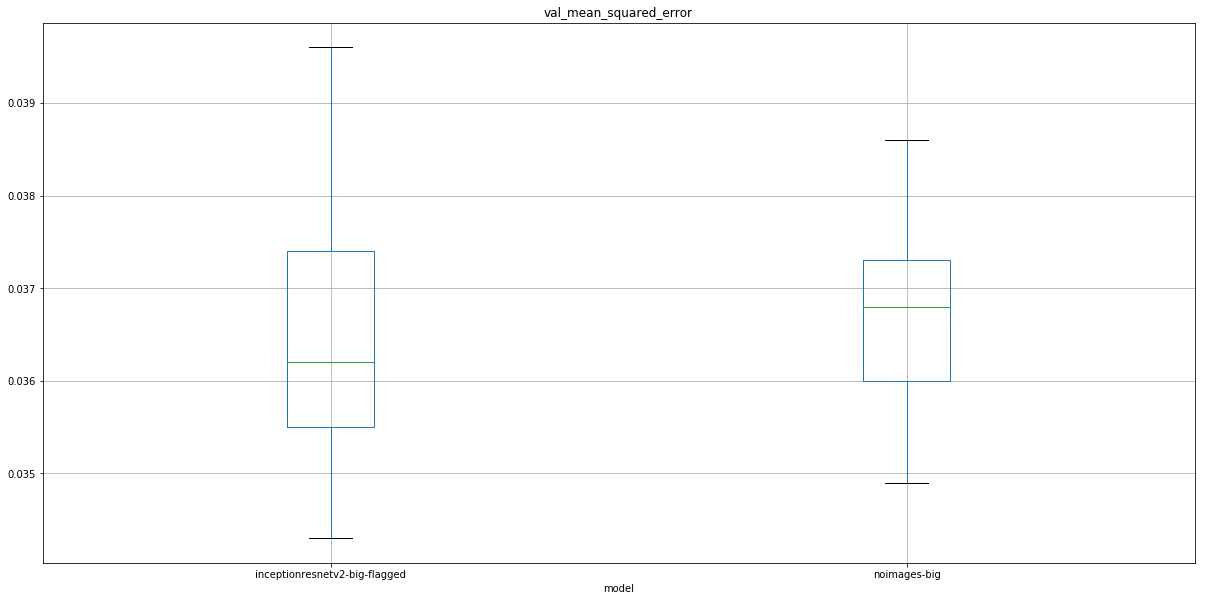

In [5]:
axes = df.boxplot(column='val_mean_squared_error', by='model', showfliers=True, figsize=(20,10))
#fig = np.asarray(axes).reshape(-1)[0].get_figure()
#np.asarray(axes).shape
fig = axes.get_figure()
fig.suptitle('')


In [6]:
np.asarray(axes).shape


()

In [7]:
pd.set_option('display.max_colwidth', -1)
df_wimages_big_flagged.sort_values(by=['val_mean_squared_error', 'model-dir'])

,time,val_mean_squared_error,epochs,model,batch-size,dev-dir,feature-shapes,image-embedding-function,model-dir,nb-epoch,nb-threads,rep,setting,train-dir
4,2018-07-13 00:29:27,0.0343,13,inceptionresnetv2-big-flagged,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_inceptionresnetv2-final-trainbig-flagged/runs/4,100,7,4,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
12,2018-07-13 17:29:38,0.0350,14,inceptionresnetv2-big-flagged,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_inceptionresnetv2-final-trainbig-flagged/runs/12,100,7,12,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
19,2018-07-14 06:47:40,0.0351,10,inceptionresnetv2-big-flagged,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_inceptionresnetv2-final-trainbig-flagged/runs/19,100,7,19,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
9,2018-07-13 09:58:07,0.0351,14,inceptionresnetv2-big-flagged,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",inception_resnet_v2.InceptionResNetV2,/mnt/hdd/experiments/abinder/clickbait/exp_inceptionresnetv2-final-trainbig-flagged/runs/9,100,7,9,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
3,2018-07-12 22:14:22,0.0352,10,inceptionresnetv2-big-flagged,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length""

In [8]:
pd.set_option('display.max_colwidth', -1)
df_noimages_big.sort_values(by=['val_mean_squared_error', 'model-dir'])

,time,val_mean_squared_error,epochs,model,batch-size,dev-dir,feature-shapes,model-dir,nb-epoch,nb-threads,rep,setting,train-dir
24,2018-07-03 10:41:33,0.0349,9,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/24,100,7,24,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
22,2018-07-03 07:16:03,0.0352,6,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/22,100,7,22,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
23,2018-07-03 09:03:58,0.0355,10,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/23,100,7,23,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
2,2018-07-01 22:50:47,0.0356,10,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/2,100,7,2,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/hdd/datasets/clickbait/clickbait17-validation-170630
11,2018-07-02 13:24:35,0.0358,6,noimages-big,100,/mnt/hdd/datasets/clickbait/clickbait17-train-170331,"{""targetParagraphs"":{""model"":""create_lstm"",""max_length"":500,""nr_hidden"":64},""postText"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetTitle"":{""model"":""create_lstm"",""max_length"":50,""nr_hidden"":30},""targetKeywords"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""targetDescription"":{""model"":""create_lstm"",""max_length"":100,""nr_hidden"":30},""postMedia"":{""model"":""create_cnn_image"",""layers"":[128]}}",/mnt/hdd/experiments/abinder/clickbait/exp_noimages-final-trainbig/runs/11,100,7,11,"{""final_layers"":[512],""dropout"":0.5,""learn_rate"":0.001}",/mnt/h

In [9]:
from scipy.stats import ttest_ind
df_wimages_big_mse_all = df_wimages_big['val_mean_squared_error']
df_wimages_big_mse_nooutliers = df_wimages_big['val_mean_squared_error'][df_wimages_big['val_mean_squared_error'] < 0.1]
df_wimages_big_flagged_mse_all = df_wimages_big_flagged['val_mean_squared_error']
df_wimages_big_flagged_mse_nooutliers = df_wimages_big_flagged['val_mean_squared_error'][df_wimages_big_flagged['val_mean_squared_error'] < 0.1]

ttest_all = ttest_ind(df_wimages_big_mse_all, df_noimages_big['val_mean_squared_error'], equal_var=False)
print('mse_mean all (w/o vs w/ images):\t%f\t%f' % (df_noimages.mean(),  df_wimages_big_mse_all.mean()))
print(ttest_all)
print()
ttest_nooutliers = ttest_ind(df_wimages_big_mse_nooutliers, df_noimages_big['val_mean_squared_error'], equal_var=False)
print('mse_mean nooutliers (w/o vs w/ images):\t%f\t%f' % (df_noimages.mean(),  df_wimages_big_mse_nooutliers.mean()))
print(ttest_nooutliers)
print()
ttest_flagged_all = ttest_ind(df_wimages_big_flagged_mse_all, df_noimages_big['val_mean_squared_error'], equal_var=False)
print('mse_mean flagged all (w/o vs w/ images):\t%f\t%f' % (df_noimages.mean(),  df_wimages_big_flagged_mse_all.mean()))
print(ttest_flagged_all)
print()
ttest_flagged_nooutliers = ttest_ind(df_wimages_big_flagged_mse_nooutliers, df_noimages_big['val_mean_squared_error'], equal_var=False)
print('mse_mean flagged nooutliers (w/o vs w/ images):\t%f\t%f' % (df_noimages.mean(),  df_wimages_big_flagged_mse_nooutliers.mean()))
print(ttest_flagged_nooutliers)


mse_mean all (w/o vs w/ images):	0.044988	0.052640
Ttest_indResult(statistic=2.155208475857781, pvalue=0.041379560126891216)

mse_mean nooutliers (w/o vs w/ images):	0.044988	0.036824
Ttest_indResult(statistic=0.494101188956567, pvalue=0.623881972259498)

mse_mean flagged all (w/o vs w/ images):	0.044988	0.036484
Ttest_indResult(statistic=-0.6441391575096947, pvalue=0.5230085954644654)

mse_mean flagged nooutliers (w/o vs w/ images):	0.044988	0.036484
Ttest_indResult(statistic=-0.6441391575096947, pvalue=0.5230085954644654)
